In [44]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Load data
df = pd.read_csv('mcv2_.csv')


In [46]:
# Display initial shape
print("Original shape:", df.shape)

Original shape: (109774, 15)


In [47]:
df.head(10)

,Age_Months,Child_Sex,Birth_Order,Delivery_Place,Delivery_Attendant,ANC_Visits,Caregiver_Education,Caregiver_Occupation,Household_Income,Marital_Status,Appointment_Reminder_System,Distance_to_HealthFacility,Transport_Mode,Season,MCV2_Status
0,47,Female,Third,Home delivery,Skilled birth attendant,1-2 visits,Primary level,Trader,Middle income,Married,No reminder system,<2km,NaN,Long rains,Missed
1,37,Female,First,Health facility,Skilled birth attendant,3-4 visits,No formal education,Unemployed,Low income,Married,No reminder system,<2km,Bicycle,Short rains,Completed on time
2,23,Male,Fourth or more,Health facility,Skilled birth attendant,3-4 visits,Secondary level,Formal employment,Below poverty line,Married,No reminder system,>10km,Public transport,Short rains,Completed on time
3,51,Female,First,Health facility,Skilled birth attendant,3-4 visits,Tertiary education,Formal employment,Middle income,Married,No reminder system,<2km,Bicycle,Long rains,Missed
4,16,Male,Second,Health facility,Skilled birth attendant,5 or more visits,Tertiary education,Trader,Middle income,Separated,CHV follow-up,2-5km,NaN,Long rains,Completed on time
5,29,Female,First,Health facility,Skilled birth attendant,1-2 visits,Tertiary education,Formal employment,Below poverty line,Married,SMS reminder,2-5km,On foot,Long rains,Delayed
6,47,Female,Third,Health facility,NaN,3-4 visits,Primary level,NaN,Middle income,Married,Immunization card only,5-10km,On foot,Dry season,Missed
7,27,Male,Fourth or more,Mission/faith-based facility,Skilled birth attendant,1-2 visits,Primary level,Trader,Low income,Single,Immunization card only,>10km,Public transport,Long rains,Delayed
8,31,Female,Second,Health facility,Skilled birth attendant,3-4 visits,Primary level,Formal employment,Middle income,Widowed,SMS reminder,<2km,Bicycle,Short rains,Completed on time
9,19,Female,First,Home delivery,Skilled birth attendant,3-4 visits,Primary level,Trader,Low income,NaN,No reminder system,NaN,Public transport,Long rains,Delayed


In [48]:
# Step 1: Clean data

# Strip whitespace and replace empty strings with NaN
df1 = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.replace('', np.nan, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2796\846104587.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [49]:
df.head(10)

,Age_Months,Child_Sex,Birth_Order,Delivery_Place,Delivery_Attendant,ANC_Visits,Caregiver_Education,Caregiver_Occupation,Household_Income,Marital_Status,Appointment_Reminder_System,Distance_to_HealthFacility,Transport_Mode,Season,MCV2_Status
0,47,Female,Third,Home delivery,Skilled birth attendant,1-2 visits,Primary level,Trader,Middle income,Married,No reminder system,<2km,NaN,Long rains,Missed
1,37,Female,First,Health facility,Skilled birth attendant,3-4 visits,No formal education,Unemployed,Low income,Married,No reminder system,<2km,Bicycle,Short rains,Completed on time
2,23,Male,Fourth or more,Health facility,Skilled birth attendant,3-4 visits,Secondary level,Formal employment,Below poverty line,Married,No reminder system,>10km,Public transport,Short rains,Completed on time
3,51,Female,First,Health facility,Skilled birth attendant,3-4 visits,Tertiary education,Formal employment,Middle income,Married,No reminder system,<2km,Bicycle,Long rains,Missed
4,16,Male,Second,Health facility,Skilled birth attendant,5 or more visits,Tertiary education,Trader,Middle income,Separated,CHV follow-up,2-5km,NaN,Long rains,Completed on time
5,29,Female,First,Health facility,Skilled birth attendant,1-2 visits,Tertiary education,Formal employment,Below poverty line,Married,SMS reminder,2-5km,On foot,Long rains,Delayed
6,47,Female,Third,Health facility,NaN,3-4 visits,Primary level,NaN,Middle income,Married,Immunization card only,5-10km,On foot,Dry season,Missed
7,27,Male,Fourth or more,Mission/faith-based facility,Skilled birth attendant,1-2 visits,Primary level,Trader,Low income,Single,Immunization card only,>10km,Public transport,Long rains,Delayed
8,31,Female,Second,Health facility,Skilled birth attendant,3-4 visits,Primary level,Formal employment,Middle income,Widowed,SMS reminder,<2km,Bicycle,Short rains,Completed on time
9,19,Female,First,Home delivery,Skilled birth attendant,3-4 visits,Primary level,Trader,Low income,NaN,No reminder system,NaN,Public transport,Long rains,Delayed


In [50]:
# Drop rows with any missing values
df.dropna(inplace=True)
print("Shape after dropping missing values:", df.shape)


Shape after dropping missing values: (64620, 15)


In [51]:
# Create binary target variable: 1 = Poor uptake (Missed or Delayed), 0 = Completed on time
df['Poor_MCV2'] = df['MCV2_Status'].apply(lambda x: 1 if x in ['Missed', 'Delayed'] else 0)


In [52]:
# Drop original MCV2_Status column
df = df.drop('MCV2_Status', axis=1)

In [53]:
# List of categorical variables
categorical_vars = [
    'Child_Sex', 'Birth_Order', 'Delivery_Place', 'Delivery_Attendant',
    'ANC_Visits', 'Caregiver_Education', 'Caregiver_Occupation',
    'Household_Income', 'Marital_Status', 'Appointment_Reminder_System',
    'Distance_to_HealthFacility', 'Transport_Mode', 'Season'
]


In [54]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in categorical_vars:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [55]:
# Features and target
X = df.drop('Poor_MCV2', axis=1)
y = df['Poor_MCV2']


KeyError: 'MCV2_Status'

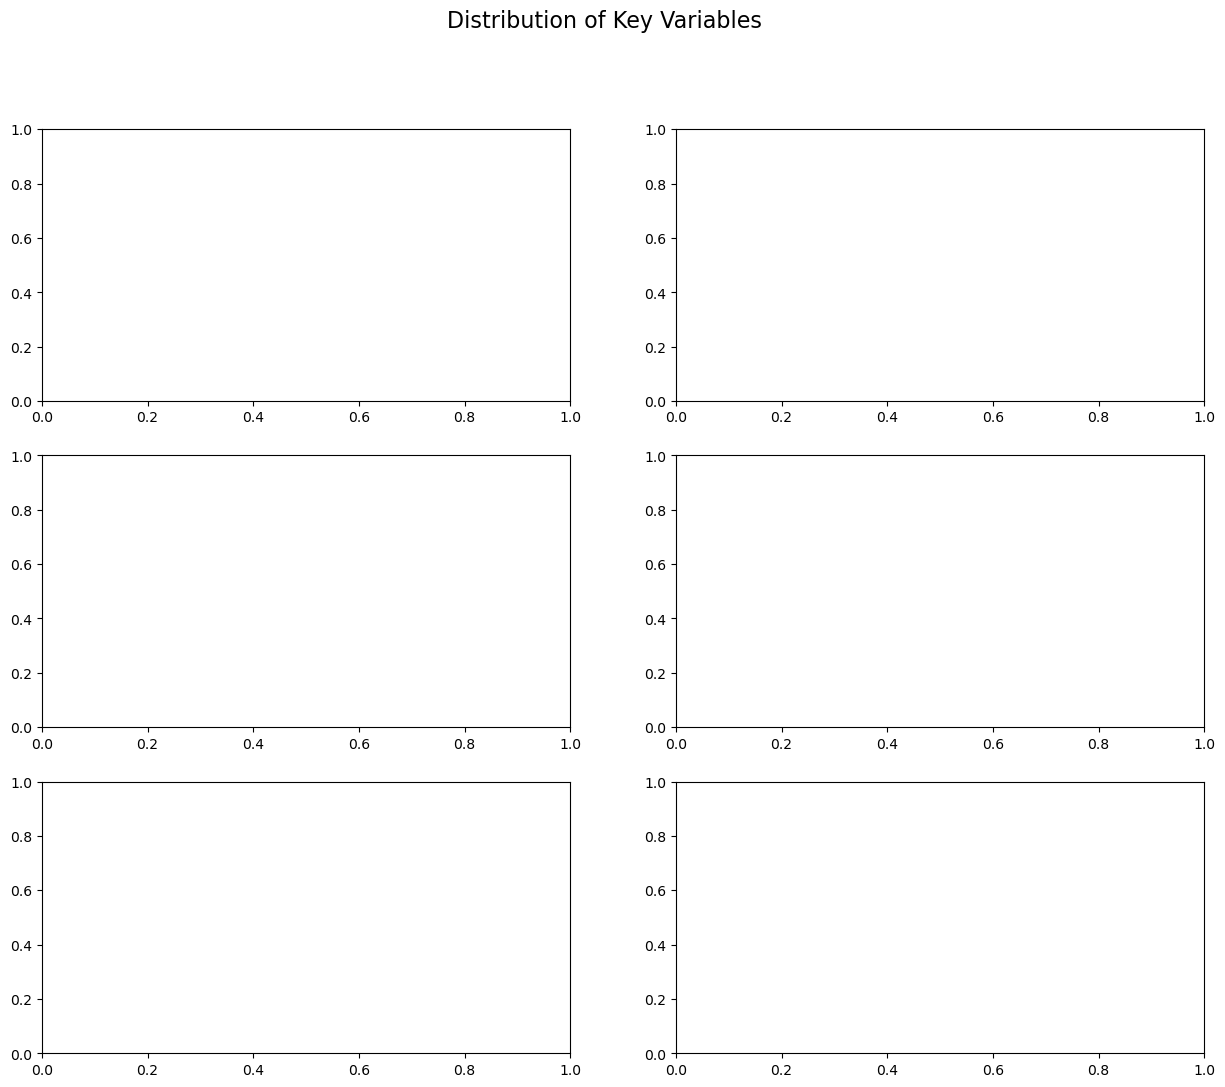

In [58]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key Variables', fontsize=16)
# Plot 1: MCV2_Status distribution
status_counts = df['MCV2_Status'].value_counts()
axes[0, 0].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
axes[0, 0].set_title('MCV2 Vaccination Status Distribution')

# Plot 2: Child Sex distribution
sex_counts = df['Child_Sex'].value_counts()
axes[0, 1].bar(sex_counts.index, sex_counts.values)
axes[0, 1].set_title('Child Sex Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Caregiver Education distribution
edu_counts = df['Caregiver_Education'].value_counts()
axes[1, 0].bar(edu_counts.index, edu_counts.values)
axes[1, 0].set_title('Caregiver Education Level Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Household Income distribution
income_counts = df['Household_Income'].value_counts()
axes[1, 1].bar(income_counts.index, income_counts.values)
axes[1, 1].set_title('Household Income Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot 5: Age distribution
axes[2, 0].hist(df['Age_Months'], bins=20, edgecolor='black')
axes[2, 0].set_title('Age Distribution (Months)')
axes[2, 0].set_xlabel('Age in Months')
axes[2, 0].set_ylabel('Frequency')

# Plot 6: Delivery Place distribution
delivery_counts = df['Delivery_Place'].value_counts()
axes[2, 1].bar(delivery_counts.index, delivery_counts.values)
axes[2, 1].set_title('Delivery Place Distribution')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('data_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


=== DATA VISUALIZATION ===


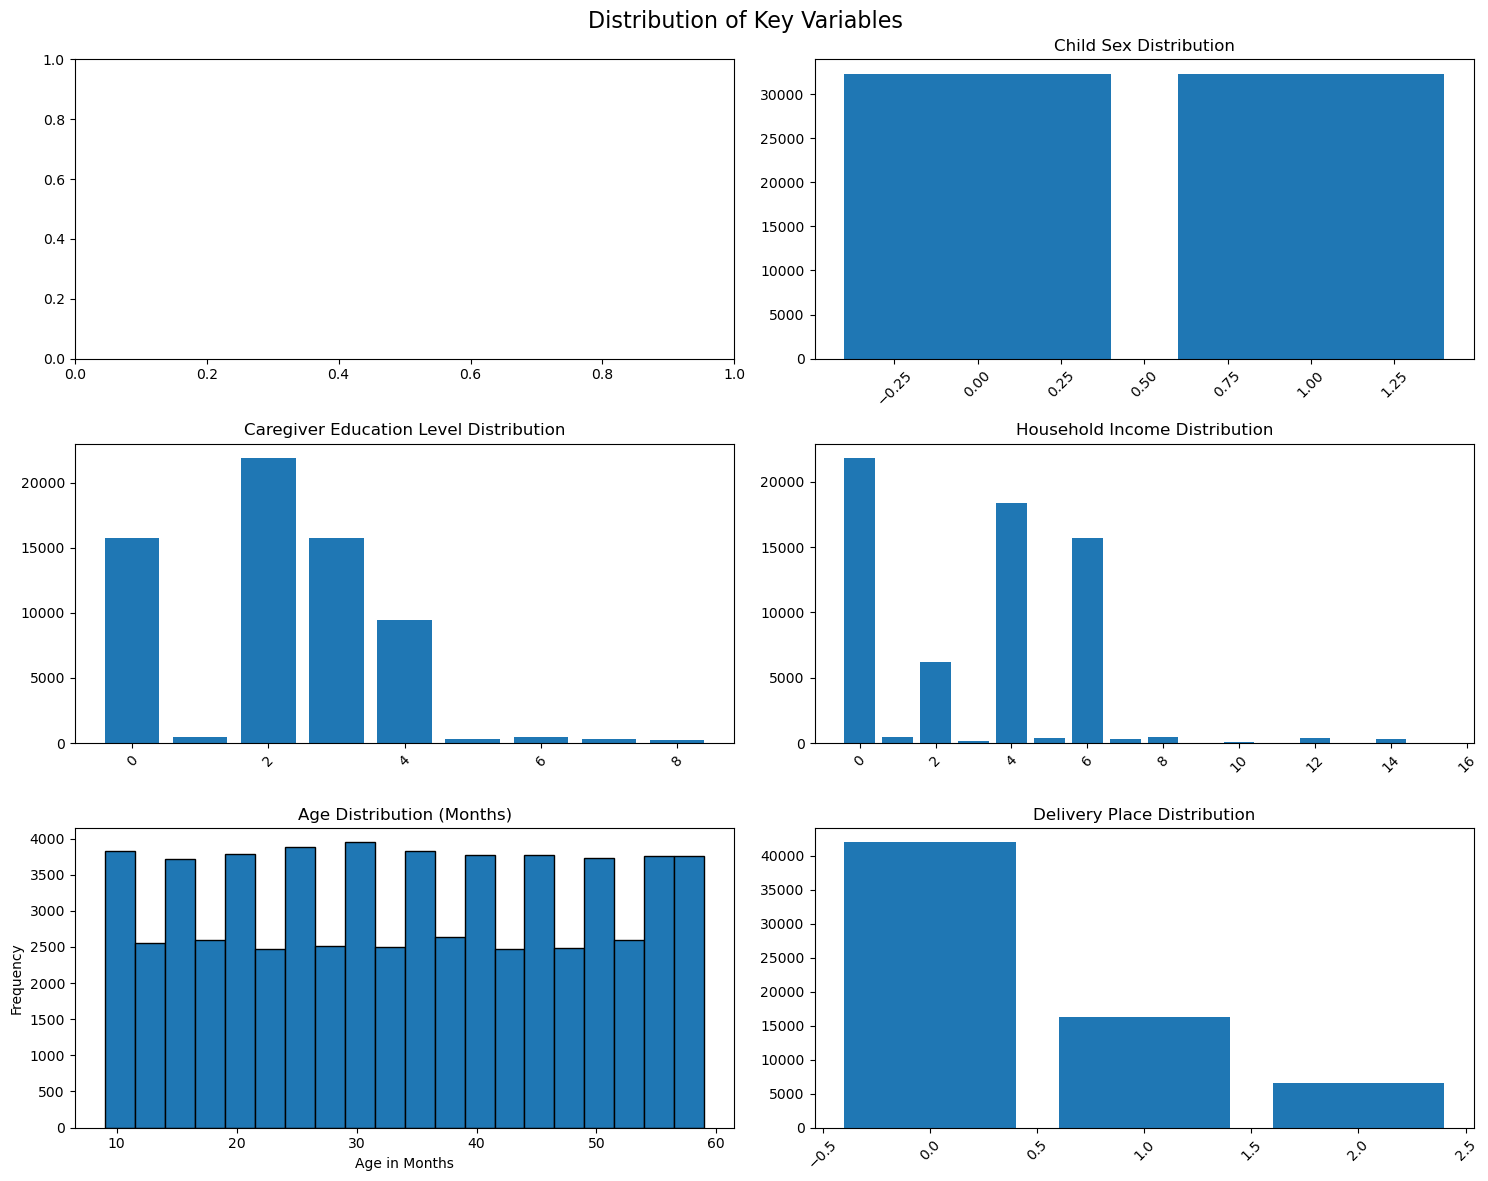

In [36]:
print("\n=== DATA VISUALIZATION ===")

# Set up the plotting layout
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key Variables', fontsize=16)
# Plot 2: Child Sex distribution
sex_counts = df['Child_Sex'].value_counts()
axes[0, 1].bar(sex_counts.index, sex_counts.values)
axes[0, 1].set_title('Child Sex Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Caregiver Education distribution
edu_counts = df['Caregiver_Education'].value_counts()
axes[1, 0].bar(edu_counts.index, edu_counts.values)
axes[1, 0].set_title('Caregiver Education Level Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Household Income distribution
income_counts = df['Household_Income'].value_counts()
axes[1, 1].bar(income_counts.index, income_counts.values)
axes[1, 1].set_title('Household Income Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot 5: Age distribution
axes[2, 0].hist(df['Age_Months'], bins=20, edgecolor='black')
axes[2, 0].set_title('Age Distribution (Months)')
axes[2, 0].set_xlabel('Age in Months')
axes[2, 0].set_ylabel('Frequency')

# Plot 6: Delivery Place distribution
delivery_counts = df['Delivery_Place'].value_counts()
axes[2, 1].bar(delivery_counts.index, delivery_counts.values)
axes[2, 1].set_title('Delivery Place Distribution')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('data_distributions.png', dpi=300, bbox_inches='tight')
plt.show()



=== EXPLORATORY DATA ANALYSIS (EDA) ===


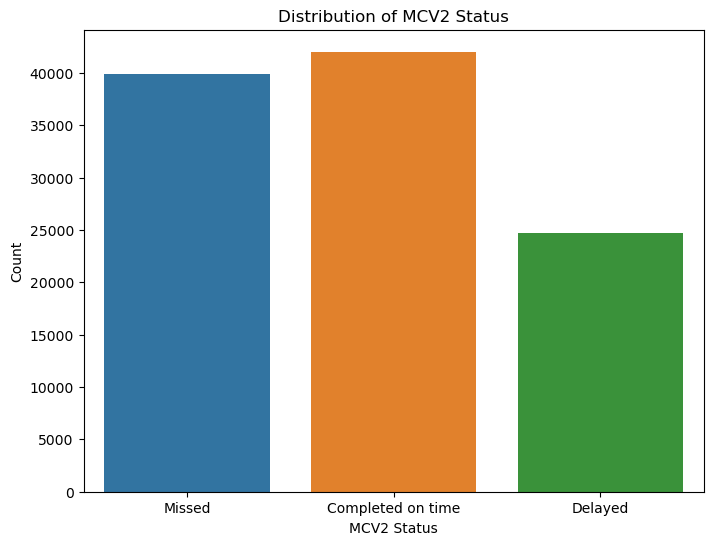

In [59]:
# Step 9: Exploratory Data Analysis (EDA)
print("\n=== EXPLORATORY DATA ANALYSIS (EDA) ===")
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='MCV2_Status', data=df1)
plt.title('Distribution of MCV2 Status')
plt.xlabel('MCV2 Status')
plt.ylabel('Count')
plt.savefig('mcv2_status_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


=== CORRELATION ANALYSIS ===


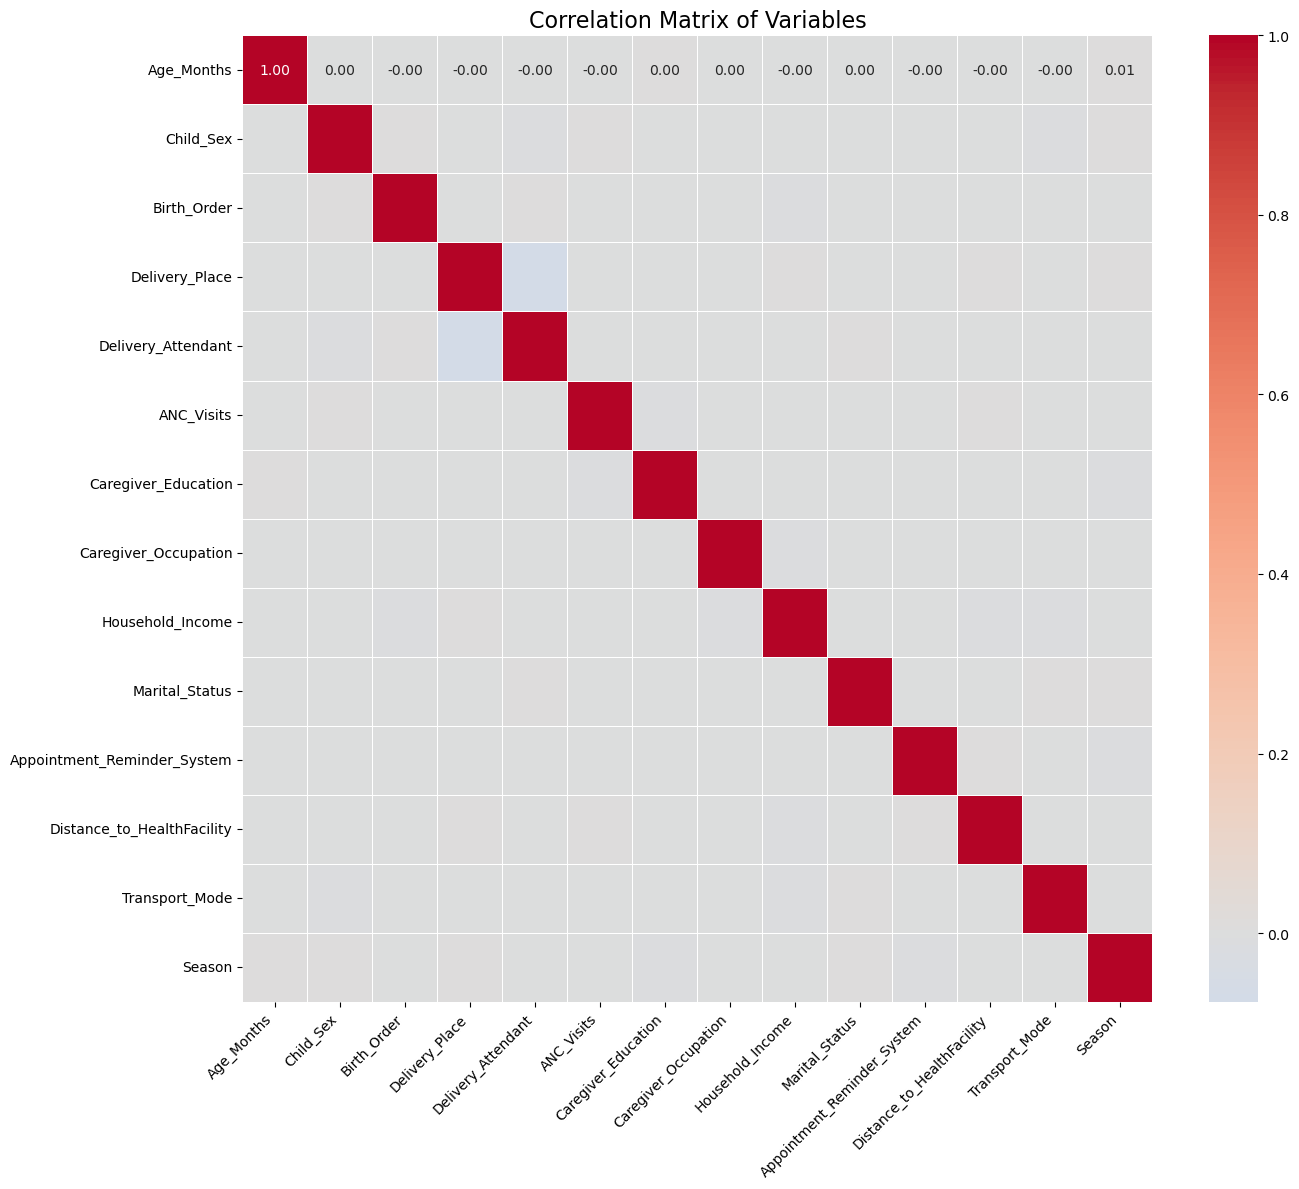

In [60]:
# Step 5: Correlation Analysis (for numerical variables)
print("\n=== CORRELATION ANALYSIS ===")

# Select numerical variables for correlation
numerical_vars = ['Age_Months']
correlation_data = df[numerical_vars].copy()

# Add encoded categorical variables for correlation analysis
label_encoders = {}
categorical_columns = [
    'Child_Sex', 'Birth_Order', 'Delivery_Place', 'Delivery_Attendant',
    'ANC_Visits', 'Caregiver_Education', 'Caregiver_Occupation',
    'Household_Income', 'Marital_Status', 'Appointment_Reminder_System',
    'Distance_to_HealthFacility', 'Transport_Mode', 'Season', 
]

for column in categorical_columns:
    le = LabelEncoder()
    correlation_data[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le
# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 1.0})
plt.title('Correlation Matrix of Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


In [61]:
# Split into train/test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [62]:
# Initialize and train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100,criterion='gini', random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [63]:
#Model Evaluation
# Predict on test set
y_pred = rf.predict(X_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.36      0.43      5223
           1       0.64      0.78      0.71      7701

    accuracy                           0.61     12924
   macro avg       0.59      0.57      0.57     12924
weighted avg       0.60      0.61      0.59     12924

Confusion Matrix:
[[1887 3336]
 [1669 6032]]



=== FEATURE IMPORTANCE ANALYSIS ===
Top 10 Most Important Features:
                        Feature  Importance
0                    Age_Months    0.221449
7          Caregiver_Occupation    0.109690
12               Transport_Mode    0.083333
8              Household_Income    0.071861
2                   Birth_Order    0.064837
11   Distance_to_HealthFacility    0.063258
6           Caregiver_Education    0.061926
9                Marital_Status    0.051950
3                Delivery_Place    0.051514
10  Appointment_Reminder_System    0.050064


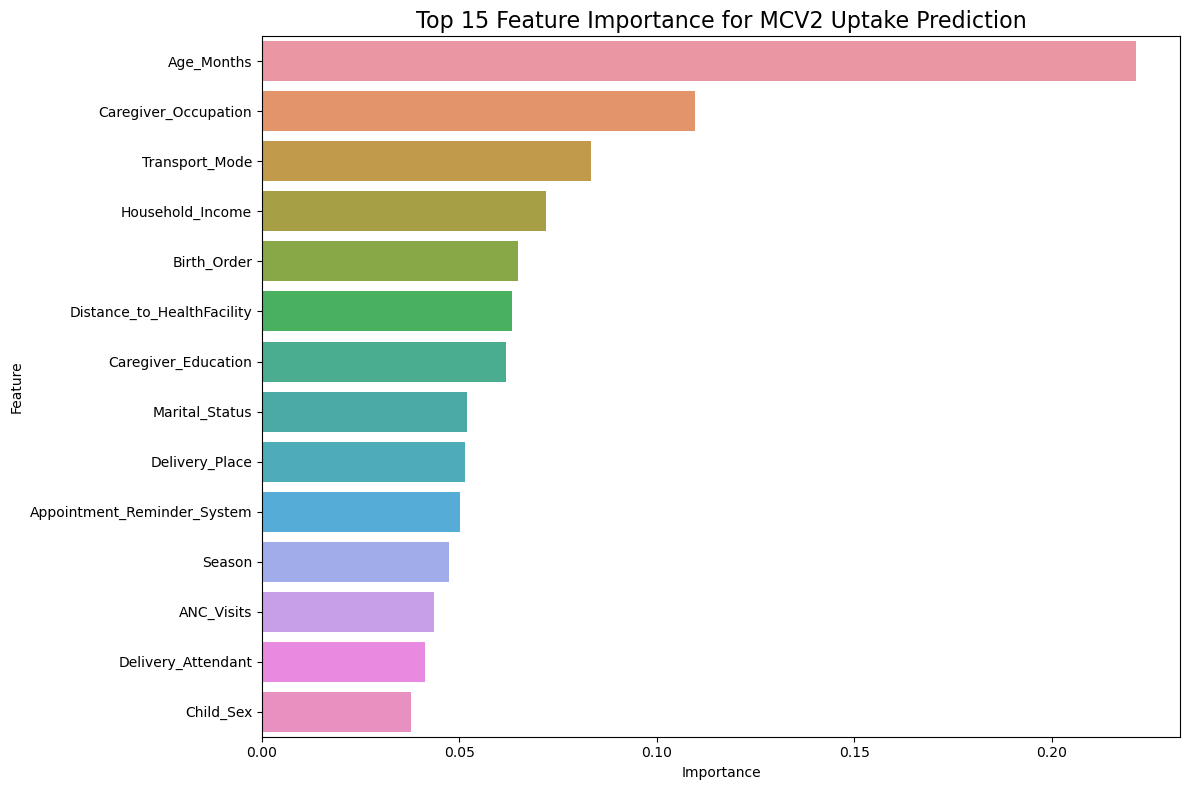

In [65]:
# Step 10: Feature Importance Analysis
print("\n=== FEATURE IMPORTANCE ANALYSIS ===")

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance for MCV2 Uptake Prediction', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()


In [66]:
# Feature importance
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

print("\nFeature Importances:")
print(feat_importances)


Feature Importances:
Age_Months                     0.221449
Caregiver_Occupation           0.109690
Transport_Mode                 0.083333
Household_Income               0.071861
Birth_Order                    0.064837
Distance_to_HealthFacility     0.063258
Caregiver_Education            0.061926
Marital_Status                 0.051950
Delivery_Place                 0.051514
Appointment_Reminder_System    0.050064
Season                         0.047378
ANC_Visits                     0.043661
Delivery_Attendant             0.041431
Child_Sex                      0.037649
dtype: float64
